In [14]:
# load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
pd.set_option('display.max_columns',18)

In [10]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [40]:
df = pd.read_csv("/gdrive/MyDrive/BigDataStudy/cardio_train.csv")  # load data sat

data observation

In [41]:
df.shape

(70000, 13)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [43]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [44]:
print(df['smoke'].value_counts())

0    63831
1     6169
Name: smoke, dtype: int64


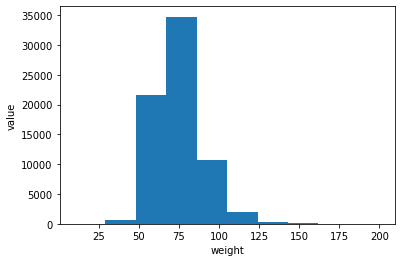

In [46]:
plt.hist(df['weight'])
plt.xlabel('weight')
plt.ylabel('value')
plt.show()

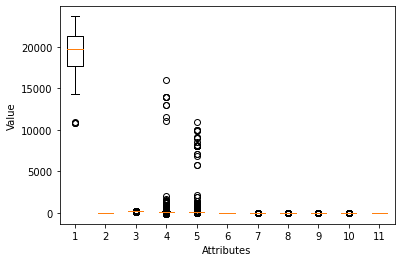

In [47]:
data_to_boxplot = [df['age'],df['gender'],
                   df['height'],df['ap_hi'],df['ap_lo'],df['cholesterol'],df['gluc'],df['smoke'],df['alco'],df['active'],df['cardio']] 
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [48]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [49]:
df = df.astype('int')

In [50]:
#splitting into training and testing datasets
training_points = df.drop(columns=['smoke'])
training_labels = df['smoke']
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.3,
    random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49000, 12)
(49000,)
(21000, 12)
(21000,)


In [51]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 ... 0 0 0]
[[19074    91]
 [ 1828     7]]
0.9086190476190477


[0.8415714285714285, 0.906952380952381, 0.8950476190476191, 0.9112380952380953, 0.9086190476190477, 0.9120952380952381, 0.9113809523809524, 0.9125714285714286, 0.9123333333333333, 0.9125238095238095, 0.9125238095238095, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477, 0.9126190476190477]


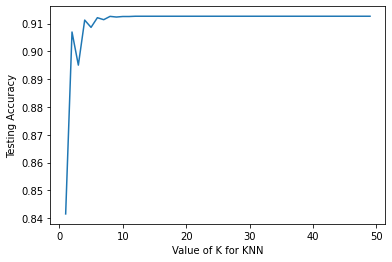

In [52]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [53]:
#changing ratios of training and test datasets
#splitting into training and testing datasets
training_points = df.drop(columns=['smoke'])
training_labels = df['smoke']
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.2,
    random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 12)
(56000,)
(14000, 12)
(14000,)


In [54]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 ... 0 0 0]
[[12702    70]
 [ 1222     6]]
0.9077142857142857


[0.8410714285714286, 0.907, 0.8948571428571429, 0.9105714285714286, 0.9077142857142857, 0.9118571428571428, 0.9111428571428571, 0.9122857142857143, 0.9122142857142858, 0.9123571428571429, 0.9124285714285715, 0.9122857142857143, 0.9123571428571429, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143]


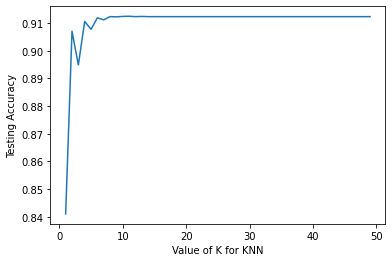

In [55]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

standardscaling

In [57]:
from sklearn.preprocessing import StandardScaler

#Create copy of dataset
df_model = df.copy()

#Rescaling features 
scaler = StandardScaler()

features = [['age','gender','height','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['smoke'])
training_labels = df_model['smoke']

[0.8410714285714286, 0.907, 0.8948571428571429, 0.9105714285714286, 0.9077142857142857, 0.9118571428571428, 0.9111428571428571, 0.9122857142857143, 0.9122142857142858, 0.9123571428571429, 0.9124285714285715, 0.9122857142857143, 0.9123571428571429, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143]


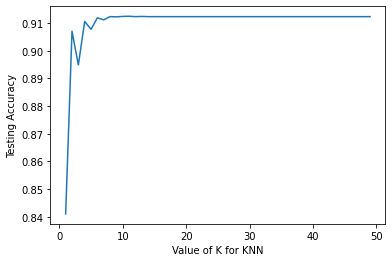

In [58]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler

#Create copy of dataset
df_model = df.copy()

#Rescaling features 
scaler = MinMaxScaler()

features = [['age','gender','height','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['smoke'])
training_labels = df_model['smoke']

[0.8410714285714286, 0.907, 0.8948571428571429, 0.9105714285714286, 0.9077142857142857, 0.9118571428571428, 0.9111428571428571, 0.9122857142857143, 0.9122142857142858, 0.9123571428571429, 0.9124285714285715, 0.9122857142857143, 0.9123571428571429, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143]


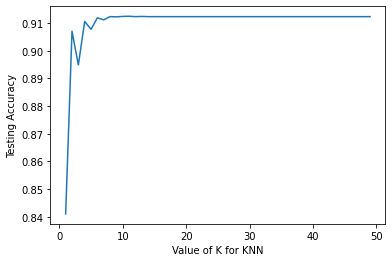

In [60]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [61]:
from sklearn.preprocessing import RobustScaler

#Create copy of dataset
df_model = df.copy()

#Rescaling features 
scaler = RobustScaler()

features = [['age','gender','height','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['smoke'])
training_labels = df_model['smoke']

[0.8410714285714286, 0.907, 0.8948571428571429, 0.9105714285714286, 0.9077142857142857, 0.9118571428571428, 0.9111428571428571, 0.9122857142857143, 0.9122142857142858, 0.9123571428571429, 0.9124285714285715, 0.9122857142857143, 0.9123571428571429, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143, 0.9122857142857143]


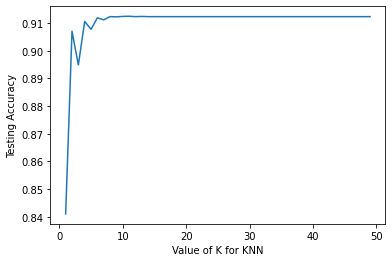

In [62]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()